In [1]:
'''
UTFPR - Cornélio Procópio
Disciplina: INTELIGÊNCIA ARTIFICIAL
Trabalho de Machine Learning
Aluno: Leonardo Batista
RA: 1885189
'''
#####################################################
##################### PRÁTICA 1 #####################
####################################################

#DEPENDENCIAS NECESSÁRIAS
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [3]:
#CARREGANDO DATASET
file = pd.read_csv('C:/Users/leonardo/Documents/GitHub/AI-project/car.csv')
#RENOMEANDO AS COLUNAS
file = file.rename(columns={'vhigh': 'buying', 'vhigh.1': 'maint', '2': 'doors', '2.1': 'persons', 'small': 'lug_boot', 'low': 'safety', 'unacc': 'class'})

In [4]:
#TRANSFORMANDO STRINGS EM FLOATS
file['buying'] = file['buying'].replace('low', 0)
file['buying'] = file['buying'].replace('med', 1)
file['buying'] = file['buying'].replace('high', 2)
file['buying'] = file['buying'].replace('vhigh', 3)

file['maint'] = file['maint'].replace('low', 0)
file['maint'] = file['maint'].replace('med', 1)
file['maint'] = file['maint'].replace('high', 2)
file['maint'] = file['maint'].replace('vhigh', 3)

file['doors'] = file['doors'].replace('5more', 5)
file['persons'] = file['persons'].replace('more', 5)

file['lug_boot'] = file['lug_boot'].replace('small', 0)
file['lug_boot'] = file['lug_boot'].replace('med', 1)
file['lug_boot'] = file['lug_boot'].replace('big', 2)

file['safety'] = file['safety'].replace('low', 0)
file['safety'] = file['safety'].replace('med', 1)
file['safety'] = file['safety'].replace('high', 2)

file['class'] = file['class'].replace('unacc', 0)
file['class'] = file['class'].replace('acc', 1)
file['class'] = file['class'].replace('good', 2)
file['class'] = file['class'].replace('vgood', 3)

#SEPARANDO VÁRIAVEIS ENTRE PREDICADO E VARÍAVEL ALVO
y = file['class']                  
x = file.drop('class', axis = 1)   

In [5]:
#FAZENDO O TREINANDO E TESTE. (TESTE EM 20%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#USANDO DECISION TREE
model = ExtraTreesClassifier() 
model.fit(x_train, y_train)

ExtraTreesClassifier()

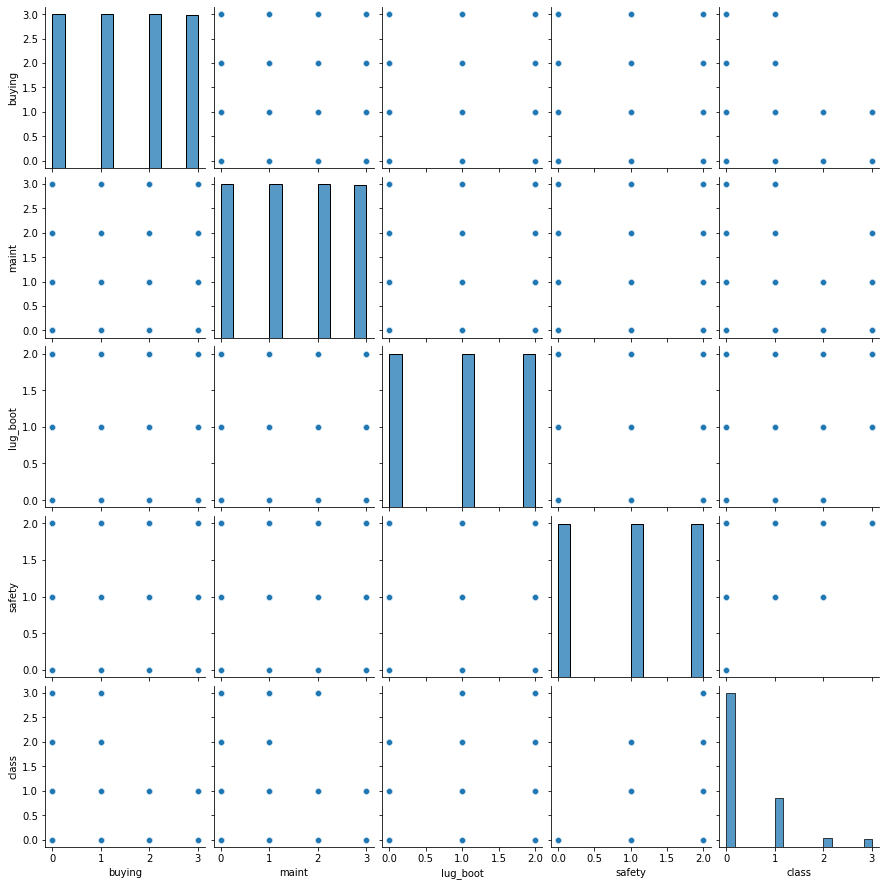

In [6]:
#MOSTRANDO MATRIZ DE DISPERSÃO
sns.pairplot(file)

<AxesSubplot:>

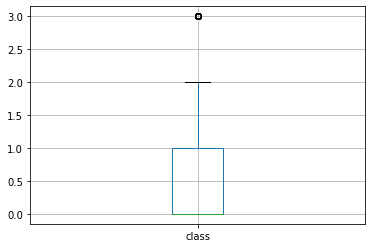

In [7]:
#GRÁFICO DE BOXPLOT
file.boxplot(column='class')

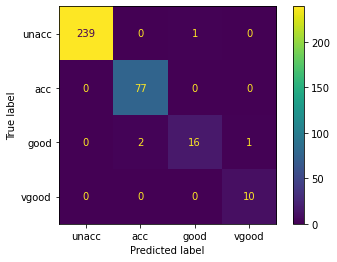

In [8]:
#CRIANDO GRÁFICO PARA VISUALIZAÇÃO DA MATRIZ DE CONFUSÃO
plot_confusion_matrix(model, x_test, y_test, display_labels = ['unacc','acc','good','vgood'])
plt.show()

In [18]:
#ACRUACIA
previous = model.predict(x_test)
print('_______RESULTADOS_______')
print('ACRUACIA: ',accuracy_score(previous, y_test))
#RENOVAÇÃO
print('RENOVAÇÃO:',list(recall_score(y_test, previous, average=None)))
#PRECISÃO
print('PRECISÃO: ',list(precision_score(y_test, previous, average=None)))
#F1-SCORE
print('F1-SCORE: ',list(f1_score(y_test, previous, average=None)))

_______RESULTADOS_______
ACRUACIA:  0.9884393063583815
RENOVAÇÃO: [0.9958333333333333, 1.0, 0.8421052631578947, 1.0]
PRECISÃO:  [1.0, 0.9746835443037974, 0.9411764705882353, 0.9090909090909091]
F1-SCORE:  [0.9979123173277662, 0.9871794871794872, 0.8888888888888888, 0.9523809523809523]
